# PROYECTO

### se lanzo una nave hace 1 mes con 13k pasajeros

### casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

### predecir qué pasajeros fueron transportados por la anomalía utilizando los registros recuperados del sistema informático dañado de la nave espacial.

# EDA

### 1. Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


### 2. upload files

In [2]:
data = pd.read_csv("train.csv")
validation = pd.read_csv("test.csv")
validation_copy = validation.copy()
submission = pd.read_csv("submission.csv")

data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
validation

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [5]:
# comparacion de cuantos datos tengo en cada dataset

# 8693 rows × 14 columns = data (train & test) 
# 4277 rows × 13 columns = validation
# 4277 rows × 2 columns = submission

# Limpieza de datos


### - elimino variables que no me serviran

In [6]:
data.drop(["PassengerId", "Cabin", "Name", "CryoSleep"], axis=1, inplace=True)
data

,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [7]:
data["Transported"].replace({False:0, True: 1}, inplace=True)
data["Transported"]

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

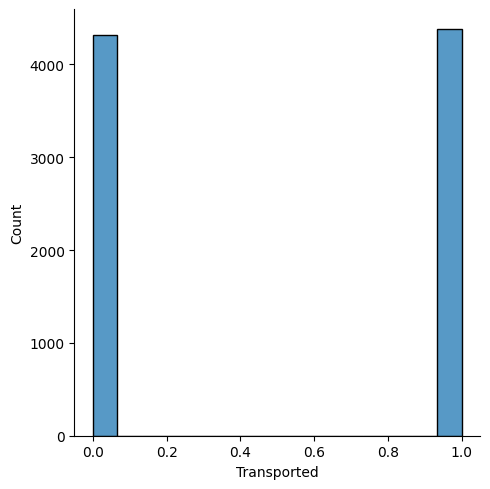

In [8]:
#supuestamente va una grafica de barras

sns.displot(data["Transported"])

### Veo el dato exacto de cuantos fueron transportados y cuantos no, hay una pequeña diferencia tal y como lo comprobe arriba

In [9]:
data_count = data["Transported"].value_counts()
data_count

1    4378
0    4315
Name: Transported, dtype: int64

In [10]:
data_percent = data_count / len(data) 
data_percent

1    0.503624
0    0.496376
Name: Transported, dtype: float64

In [11]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


### mkiramos que hay nulos

In [12]:
data.isnull().sum()

HomePlanet      201
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [13]:
combination = data_clean.append(validation)
combination

NameError: name 'data_clean' is not defined

In [ ]:
combination.info()

In [ ]:
combination.describe()

In [ ]:
combination.isnull().sum()

# Tratamiento de datos

In [14]:
# Tratamiento valores nulos de columna Age
def fill_null(data):
    #columna Age
    age_median = data["Age"].mean()
    data["Age"].fillna(age_median,inplace= True)
    validation["Age"].fillna(age_median,inplace= True)
    # Columna HomePlanet
    homeplanet_mode = data["HomePlanet"].mode()[0]
    data["HomePlanet"].fillna(homeplanet_mode,inplace= True)
    validation["HomePlanet"].fillna(homeplanet_mode,inplace= True)
    #Columna Destination
    Destination_mode = data["Destination"].mode()[0]
    data["Destination"].fillna(Destination_mode,inplace= True)
    validation["Destination"].fillna(Destination_mode,inplace= True)
    #Columna 
    data["VIP"].astype(bool)
    data["VIP"].fillna(False,inplace= True)
    validation["VIP"].fillna(False,inplace= True)
    #Columna RoomService
    data["RoomService"].fillna(0.0,inplace=True)
    validation["RoomService"].fillna(0.0,inplace= True)
    #Columna FoodCourt
    data["FoodCourt"].fillna(0.0,inplace= True)
    validation["FoodCourt"].fillna(0.0,inplace= True)
    #Columna ShoppingMall
    data["ShoppingMall"].fillna(0.0,inplace= True)
    validation["ShoppingMall"].fillna(0.0,inplace= True)
    #Columna Spa
    data["Spa"].fillna(0.0,inplace= True)
    validation["Spa"].fillna(0.0,inplace= True)
    #Columna VRDeck
    data["VRDeck"].fillna(0.0,inplace= True)
    validation["VRDeck"].fillna(0.0,inplace= True)
    return (data,validation)
data,validation=fill_null(data)

print("Porcentaje de valores nulos "+str((data.isnull().sum().sum()/len(data))*100))

Porcentaje de valores nulos 0.0


In [15]:
data.isnull().sum()

HomePlanet      0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

### definir X and y

In [16]:
X = data.drop("Transported", axis=1)
y = data["Transported"]

In [17]:
X.head()


,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [18]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   Destination   8693 non-null   object 
 2   Age           8693 non-null   float64
 3   VIP           8693 non-null   bool   
 4   RoomService   8693 non-null   float64
 5   FoodCourt     8693 non-null   float64
 6   ShoppingMall  8693 non-null   float64
 7   Spa           8693 non-null   float64
 8   VRDeck        8693 non-null   float64
 9   Transported   8693 non-null   int64  
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 619.8+ KB


In [21]:
# Creo una columna por cada variable(categorica) --> estrategia one code enciding y min max (variables numericas entre 0 y 1)
categoricas = ["HomePlanet","VIP","Destination"]
numericas =["Age","RoomService","FoodCourt", "ShoppingMall", "Spa","VRDeck"]

In [22]:
#Creo trasnformadores (aplicara un minmaxscaler para nuemricas)
transformer_numerico =("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico =("transformer_categorico",OneHotEncoder(), categoricas)

In [23]:
#Creo transformador de columnas
transformer = ColumnTransformer([transformer_numerico,transformer_categorico], remainder ="passthrough")
#con passthrough , las columnas que no pueda transformar no hace nada
# Normalizar en un rango similar para todas las variables numericas (Devuelve vector disperso)
X =transformer.fit_transform(X)


In [24]:
X_data=pd.DataFrame(X, columns = transformer.get_feature_names_out())
# Vector disperso ..> Cada valor categorico lo convierte en columna y tiene valor 0 o 1 el resto de variable snumericas tambien tendran

In [25]:
X_data

,transformer_numerico__Age,transformer_numerico__RoomService,transformer_numerico__FoodCourt,transformer_numerico__ShoppingMall,transformer_numerico__Spa,transformer_numerico__VRDeck,transformer_categorico__HomePlanet_Earth,transformer_categorico__HomePlanet_Europa,transformer_categorico__HomePlanet_Mars,transformer_categorico__VIP_False,transformer_categorico__VIP_True,transformer_categorico__Destination_55 Cancri e,transformer_categorico__Destination_PSO J318.5-22,transformer_categorico__Destination_TRAPPIST-1e
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
8689,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8690,0.329114,0.000000,0.000000,0.079687,0.000045,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8691,0.405063,0.000000,0.035186,0.000000,0.015753,0.134049,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# given:
# features: xs
# ground truth: ys

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=0)

In [27]:
#aca me muestra la cantidad de datos a usar en training y test

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5824, 14), (2869, 14), (5824,), (2869,))

Matriz de confusion


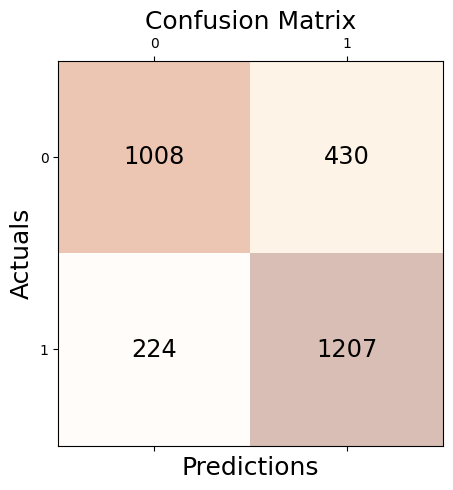

METRICAS
Precision: 0.737
Recall: 0.843
Accuracy: 0.772
F1 Score: 0.787
METRICAS TRAIN:
Precision_train: 0.765
Recall_train: 0.851
Accuracy_train: 0.792
F1 Score_train: 0.805


In [28]:
# Arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def tree_clasiffier():
    modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )
    # Entrenamiento del modelo
    modelo.fit(X_train, y_train)
    # Estructura del árbol creado
    # ------------------------------------------------------------------------------

    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Matriz de confusion")
    fig1, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    y_pred_train = modelo.predict(X_train)

    print("METRICAS")
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))

    print("METRICAS TRAIN:")
    print('Precision_train: %.3f' % precision_score(y_train, y_pred_train))
    print('Recall_train: %.3f' % recall_score(y_train, y_pred_train))
    print('Accuracy_train: %.3f' % accuracy_score(y_train, y_pred_train))
    print('F1 Score_train: %.3f' % f1_score(y_train, y_pred_train))

tree_clasiffier()

# VALIDATION

In [29]:
validation.drop(["PassengerId", "Cabin", "Name", "CryoSleep"], axis=1, inplace=True)
validation

,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,TRAPPIST-1e,27.00000,False,0.0,0.0,0.0,0.0,0.0
1,Earth,TRAPPIST-1e,19.00000,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,55 Cancri e,31.00000,False,0.0,0.0,0.0,0.0,0.0
3,Europa,TRAPPIST-1e,38.00000,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,TRAPPIST-1e,20.00000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4272,Earth,TRAPPIST-1e,34.00000,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,TRAPPIST-1e,42.00000,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,55 Cancri e,28.82793,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,TRAPPIST-1e,28.82793,False,0.0,2680.0,0.0,0.0,523.0


In [30]:
validation.isnull().sum()

HomePlanet      0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [31]:
X_validation=validation

In [32]:
# Creo una columna por cada variable(categorica) --> estrategia one code enciding y min max (variables numericas entre 0 y 1)
categoricas = ["HomePlanet","VIP","Destination"]
numericas =["Age","RoomService","FoodCourt", "ShoppingMall", "Spa","VRDeck"]

In [33]:

X_validation =transformer.transform(X_validation)

In [34]:
pd.DataFrame(X_validation, columns = transformer.get_feature_names_out())
# Vector disperso ..> Cada valor categorico lo convierte en columna y tiene valor 0 o 1 el resto de variable snumericas tambien tendran

,transformer_numerico__Age,transformer_numerico__RoomService,transformer_numerico__FoodCourt,transformer_numerico__ShoppingMall,transformer_numerico__Spa,transformer_numerico__VRDeck,transformer_categorico__HomePlanet_Earth,transformer_categorico__HomePlanet_Europa,transformer_categorico__HomePlanet_Mars,transformer_categorico__VIP_False,transformer_categorico__VIP_True,transformer_categorico__Destination_55 Cancri e,transformer_categorico__Destination_PSO J318.5-22,transformer_categorico__Destination_TRAPPIST-1e
0,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.240506,0.000000,0.000302,0.000000,0.125982,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.392405,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.481013,0.000000,0.223124,0.000000,0.008077,0.024241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.253165,0.000698,0.000000,0.027030,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.430380,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4273,0.531646,0.000000,0.028410,0.000724,0.000446,0.005967,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4274,0.364911,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4275,0.364911,0.000000,0.089894,0.000000,0.000000,0.021672,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [35]:
X_validation

array([[3.41772152e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.40506329e-01, 0.00000000e+00, 3.01881729e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.92405063e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.64910512e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.64910512e-01, 0.00000000e+00, 8.98936705e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.44303797e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [41]:
def predict(modelo):
    modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )
# Entrenamiento del modelo
    modelo.fit(X_train, y_train)
    y_pred=modelo.predict(X_validation)
    pred=pd.DataFrame({
    'PassengerId':validation_copy['PassengerId'],
    'Transported': y_pred
     })

    return pred

In [46]:
dec_reg = DecisionTreeClassifier()
pred

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [63]:
pred["Transported"]=pred["Transported"].astype(bool)
pred

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [64]:
pred.to_csv('submission.csv', index=False)